### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Part 1

### Planned approach

Aim of the analysis: Explore NHS appointment data to understand how services are being used and whether existing capacity is meeting demand. The NHS also wants to know more about missed appointments and whether external data such as Twitter could help explain or predict patterns in service use.

To start, the analysis will involve reviewing the dataset provided, consisting of appointments_regional.csv, actual_duration.csv, and national_categories.xlsx, to understand what information is included, the time period covered, and any gaps or limitations. Basic checks will be carried out to confirm the number of locations, service settings, and appointment types.

Once the data is cleaned and prepared, visualisations will be used to explore trends over time, such as seasonal changes in appointment numbers, differences between service settings, and patterns in attendance (including “Did Not Attend” rates).

The Twitter data will be analysed separately to see if public comments or trends show anything that might support or contrast with the service data. The goal is to identify useful insights that could help NHS decision-makers plan resources more effectively and reduce missed appointments.

# Part 2

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#### Dataset sense-check
The three files (actual_duration.csv, appointments_regional.csv, and national_categories.xlxs) were checked for missing values, their metadata assessed, and descriptive statistics generated to understand the structure and quality of the data.

In [135]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv ("actual_duration.csv")

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [136]:
# Determine whether there are missing values.
print(ad.isnull().sum())

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [137]:
# Determine the metadata of the data set.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [138]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [139]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv ("appointments_regional.csv")

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [140]:
# Determine whether there are missing values.
print(ar.isnull().sum())

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [141]:
# Determine the metadata of the data set.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [142]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [144]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel ("national_categories.xlsx")

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [145]:
# Determine whether there are missing values.
print(nc.isnull().sum())

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [146]:
# Determine the metadata of the data set.
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [147]:
# Determine the descriptive statistics of the data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


#### Observations

All three files contain complete data, with no missing values reported. Each dataset includes a mix of categorical (object) and numeric columns. Most columns are stored as text, which is appropriate for identifiers and categorical variables such as region names or appointment duration ranges.  

In each file, count_of_appointments is numeric (int64) and provides appointment volumes, which can be aggregated or compared across categories. The appointment_date field in each dataset is stored as text; this will need to be converted to datetime format for any time-based analysis. 

The .describe() output provides a numerical summary of the data, such as the mean, minimum, and maximum appointment counts.  Since each row in this dataset represents aggregated appointment totals (for example, by location or by national category), these statistics are not especially informative.  However they do confirm that there is much variation in appointment volumes across different categories and locations, which requires further exploratory analysis.

Overall, the datasets are clean and complete and require only minor adjustments before analysis is performed.

### Exploration of the data set

In this section, the dataset is examined to gain an initial understanding of its structure and coverage.  Key checks include identifying the number of unique locations, service settings, context types, national categories, and appointment statuses.  Summary counts and examples are used to confirm data completeness and consistency across categories.

**Question 1:** How many locations are there in the data set?

In [148]:
# Determine the number of locations.
location_counts = ad['sub_icb_location_name'].value_counts()
print("Number of unique locations:", location_counts.count())

Number of unique locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [149]:
# Determine the top five locations based on record count.
top_locations = (
    ad.groupby('sub_icb_location_name')['count_of_appointments']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 locations with the highest number of appointments:")
print(top_locations)

Top 5 locations with the highest number of appointments:
sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [150]:
# Determine the number of service settings.
service_setting_counts = nc['service_setting'].value_counts()
print("Number of service settings:", service_setting_counts.count())

Number of service settings: 5


In [151]:
# Determine the number of context types.
context_type_counts = nc['context_type'].value_counts()
print("Number of context types:", context_type_counts.count())

Number of context types: 3


In [152]:
# Determine the number of national categories.
national_category_counts = nc['national_category'].value_counts()
print("Number of national categories:", national_category_counts.count())

Number of national categories: 18


In [153]:
# Determine the number of appointment statuses.
appointment_status_counts = ar['appointment_status'].value_counts()
print("Number of appointment statuses:", appointment_status_counts.count())

Number of appointment statuses: 3


#### Observations
The dataset covers 106 locations, with the highest appointment volumes seen in North West London. The number of service settings, context types, national categories, and appointment statuses were noted.

# Part 3

### Continued exploration of the data, searching for answers to more specific questions posed by the NHS.

This section examines the time coverage and basic activity trends in the dataset to build a clearer understanding of service activity. The date range of appointments was confirmed, and the date format of the ad and nc dataframes were changed to datetime to enable further analysis. The data was explored to find answers to specific questions, specifically the most popular service setting for NHS North West London in early 2022, the month with the highest appointment volume, and the number of records reported per month.

**Question 1:** Between what dates were appointments scheduled? 

In [154]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [155]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [156]:
# Change the date format of ad['appointment_date'].
from datetime import datetime
ad['appointment_date'] = ad['appointment_date'].apply(
    lambda x: datetime.strptime(x, "%d-%b-%y")
)

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [157]:
# Change the date format of ar['appointment_month'].
from datetime import datetime

ar['appointment_month'] = ar['appointment_month'].apply(
    lambda x: datetime.strptime(x + "-01", "%Y-%m-%d")
)
# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [158]:
# Change the date format of nc['national_categories'].
from datetime import datetime

nc['appointment_month'] = nc['appointment_month'].apply(
    lambda x: datetime.strptime(x + "-01", "%Y-%m-%d")
)
# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01


In [159]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

def print_min_max_dates(df, column):
    """ Prints the earliest and latest dates in a specified DataFrame column. """
    
    print("Earliest date:", df[column].min())
    print("Latest date:", df[column].max())

print_min_max_dates(ad, 'appointment_date')

Earliest date: 2021-12-01 00:00:00
Latest date: 2022-06-30 00:00:00


In [160]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

print_min_max_dates(nc, 'appointment_month')

Earliest date: 2021-08-01 00:00:00
Latest date: 2022-06-01 00:00:00


In [161]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.

print_min_max_dates(ar, 'appointment_month')

Earliest date: 2020-01-01 00:00:00
Latest date: 2022-06-01 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [162]:
# Filter for NHS North West London and the date range
nw_london = nc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (nc['appointment_date'] >= '2022-01-01') &
    (nc['appointment_date'] <= '2022-06-01')
]

# Group by service setting and sum the appointment counts
setting_counts = nw_london.groupby('service_setting')['count_of_appointments'].sum()

# Sort and show the most popular setting
most_popular_setting = setting_counts.sort_values(ascending=False)

# Show the output
print(most_popular_setting.head(1))

service_setting
General Practice    4804239
Name: count_of_appointments, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [163]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Extract month (and year) from appointment_date
nc['month'] = nc['appointment_date'].dt.to_period('M')

# Group by month and sum the appointment counts
monthly_counts = nc.groupby('month')['count_of_appointments'].sum()

# Sort descending to find the month with the highest total
sorted_monthly_counts = monthly_counts.sort_values(ascending=False)

# View the top month
print("Month with the highest number of appointments:")
print(sorted_monthly_counts.head(1))

Month with the highest number of appointments:
month
2021-11    30405070
Freq: M, Name: count_of_appointments, dtype: int64


**Question 4:** What was the total number of records per month?

In [164]:
# Total number of records per month.

# Extract month (and year) from appointment_date
nc['month'] = nc['appointment_date'].dt.to_period('M')

# Count the number of records per month
records_per_month = nc.groupby('month').size()

# View the result
print("Total number of records per month:")
print(records_per_month)

Total number of records per month:
month
2021-08    69999
2021-09    74922
2021-10    74078
2021-11    77652
2021-12    72651
2022-01    71896
2022-02    71769
2022-03    82822
2022-04    70012
2022-05    77425
2022-06    74168
Freq: M, dtype: int64


#### Observations
Appointments in the dataset span from January 2020 to June 2022. General Practice was the most common service setting for NHS North West London during this period. November 2021 showed the highest appointment volume, with another smaller peak in March 2022. Overall, the number of records per month was relatively stable, suggesting consistent reporting. The findings confirm that primary care accounts for most of the activity captured in the dataset.

# Part 4

### Creation of visualisations and identification of possible monthly and seasonal trends in the data.

### Section 1
In this section, visualisations were created to explore how appointment volumes varied over time across different dimensions. Using Seaborn and Matplotlib, line plots were produced for service settings, context types, and national categories to identify monthly and seasonal patterns. The data was aggregated at the monthly level and reformatted for clarity, allowing comparison of appointment trends between different service and context categories.

In [165]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(10, 6)})

# Set the plot style as white.
sns.set_style('white')

In [166]:
# Change the data type of the appointment month to string to allow for easier plotting.

# Create a copy of nc for plotting
nc_plot = nc.copy()

# Convert appointment_date to a year-month string for plotting
nc_plot['month'] = nc_plot['appointment_date'].dt.strftime('%Y-%m')

In [167]:
# Aggregate on monthly level and determine the sum of records per month.
monthly_appointments = nc_plot.groupby('month')['count_of_appointments'].sum().reset_index()

# View output.
print(monthly_appointments)

      month  count_of_appointments
0   2021-08               23852171
1   2021-09               28522501
2   2021-10               30303834
3   2021-11               30405070
4   2021-12               25140776
5   2022-01               25635474
6   2022-02               25355260
7   2022-03               29595038
8   2022-04               23913060
9   2022-05               27495508
10  2022-06               25828078


**Service settings:**

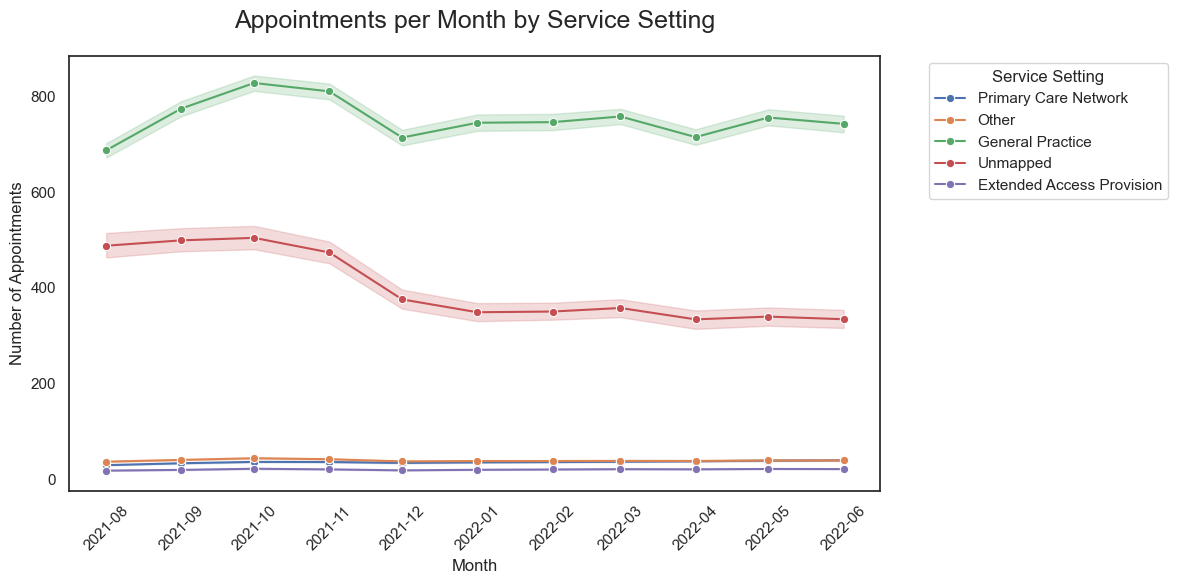

In [115]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

plt.figure(figsize=(12,6))
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting', 
    data=nc_plot,
    marker='o'
)

plt.title('Appointments per Month by Service Setting', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

In [168]:
# Create a separate data set that can be used in future weeks. 

# Create a new dataset showing total appointments per month and context type
context_type_monthly = (
    nc_plot.groupby(['appointment_month', 'context_type'])['count_of_appointments']
    .sum()               
    .reset_index()
)

# View output.
context_type_monthly

,appointment_month,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135
5,2021-09-01,Unmapped,1336115
6,2021-10-01,Care Related Encounter,26125201
7,2021-10-01,Inconsistent Mapping,2811977
8,2021-10-01,Unmapped,1366656
9,2021-11-01,Care Related Encounter,26282778


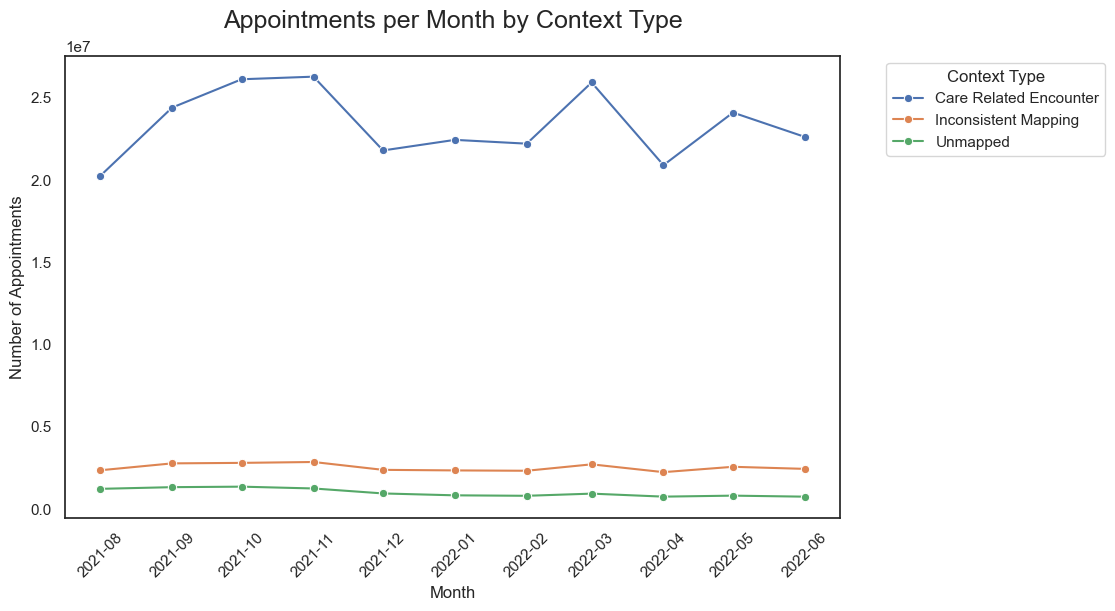

In [169]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='context_type', 
    data=context_type_monthly,
    marker='o'
)

plt.title('Appointments per Month by Context Type', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Context Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

**National categories:**

In [170]:
# Create a separate data set that can be used in future weeks. 

# Create a new dataset showing total appointments per month and context type
national_categories_monthly = (
    nc_plot.groupby(['appointment_month', 'national_category'])['count_of_appointments']
    .sum()               
    .reset_index()
)

# View output.
national_categories_monthly

,appointment_month,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care and Support Planning,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045
...,...,...,...
193,2022-06-01,Social Prescribing Service,55066
194,2022-06-01,Structured Medication Review,187800
195,2022-06-01,Unmapped,758640
196,2022-06-01,Unplanned Clinical Activity,274491


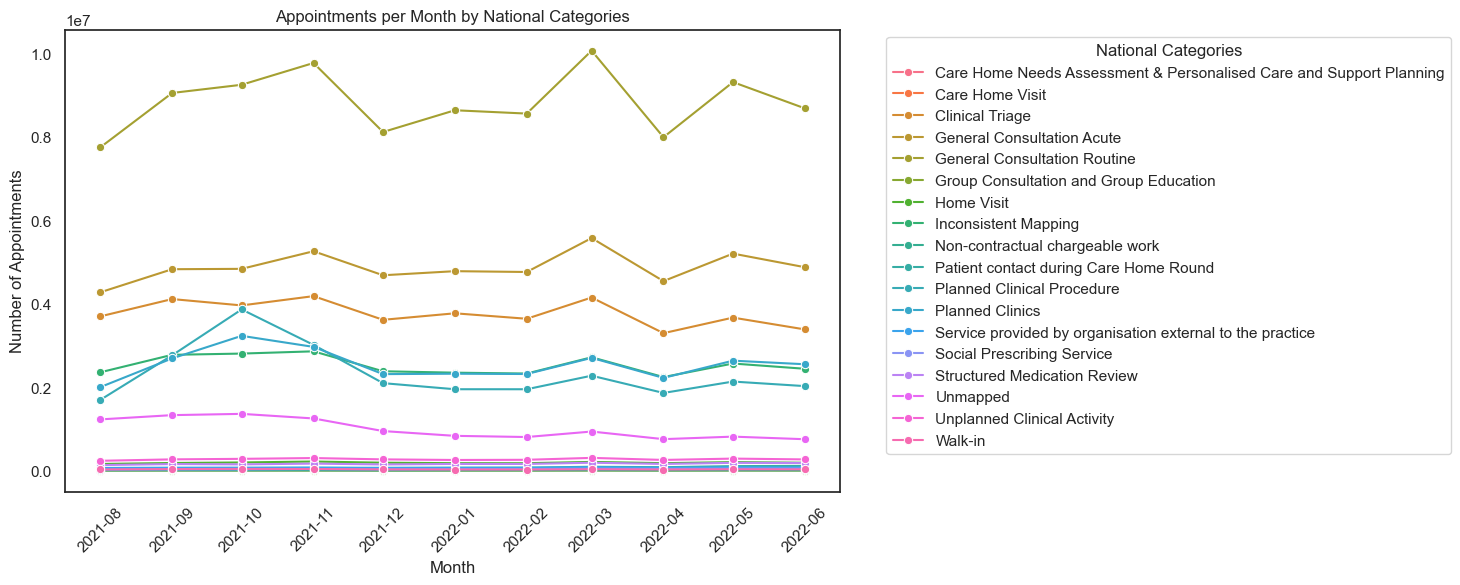

In [171]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.

sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='national_category', 
    data=national_categories_monthly,
    marker='o'
)

plt.title('Appointments per Month by National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='National Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations  
Looking across service settings, context types, and national categories, there are clear ups and downs through the year, with peaks around November 2021 and again in March 2022. This suggests some seasonal variation, probably related to winter demand or backlogs being cleared. Most of the activity comes from General Practice, while other settings make up a much smaller share. The context type field doesn’t show much variation, as nearly all entries are recorded as “Care Related Encounter.” National categories follow roughly the same overall pattern, with only small differences between them. In general, appointment numbers stay fairly steady month to month, apart from those short spikes.

### Section 2
In this section, separate visualisations were created to show appointment volumes for each season: summer, autumn, winter, and spring. The aim was to compare service settings across different times of the year and look for signs of seasonal variation.

**Summer (June to August 2021):**

In [172]:
# Create a separate data set that can be used in future weeks. 

# Filter for June–August 2021
summer = nc_plot[
    (nc_plot['appointment_month'] >= '2021-06-01') &
    (nc_plot['appointment_month'] <= '2021-08-31')
]

# Save for future use
summer.to_csv('summer_data.csv', index=False)

# View output
summer.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,2021-08


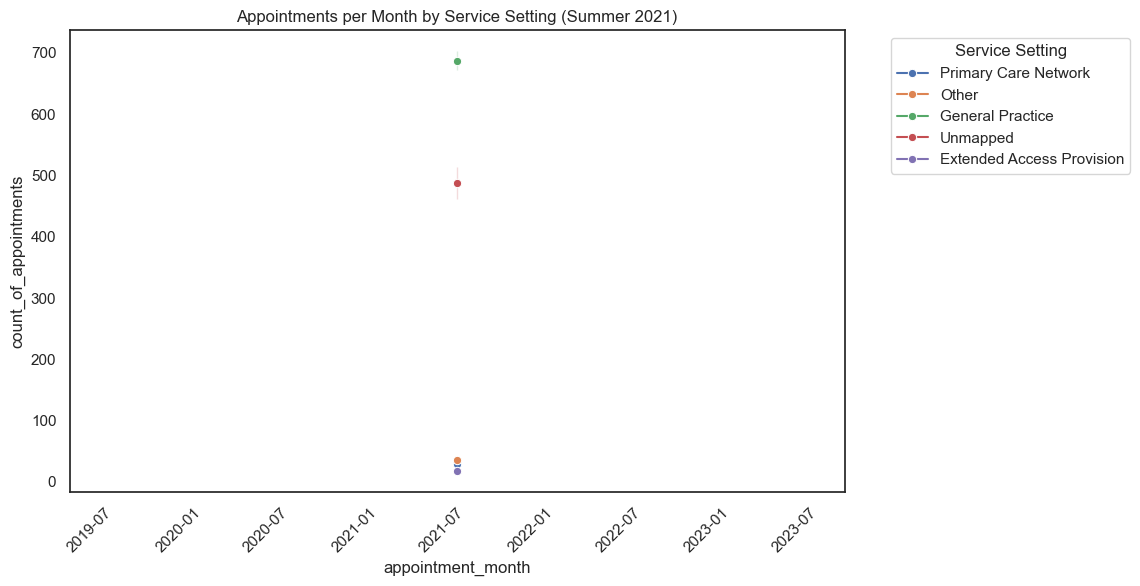

In [173]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.

sns.lineplot(
    data=summer,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o'
)
plt.title('Appointments per Month by Service Setting (Summer 2021)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [174]:
# Create a 'season' column based on the month
def get_season(month):
    if month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'

nc_plot['season'] = nc_plot['appointment_month'].dt.month.apply(get_season)

# View the result
nc_plot[['appointment_month', 'season']].head()

,appointment_month,season
0,2021-08-01,Summer
1,2021-08-01,Summer
2,2021-08-01,Summer
3,2021-08-01,Summer
4,2021-08-01,Summer


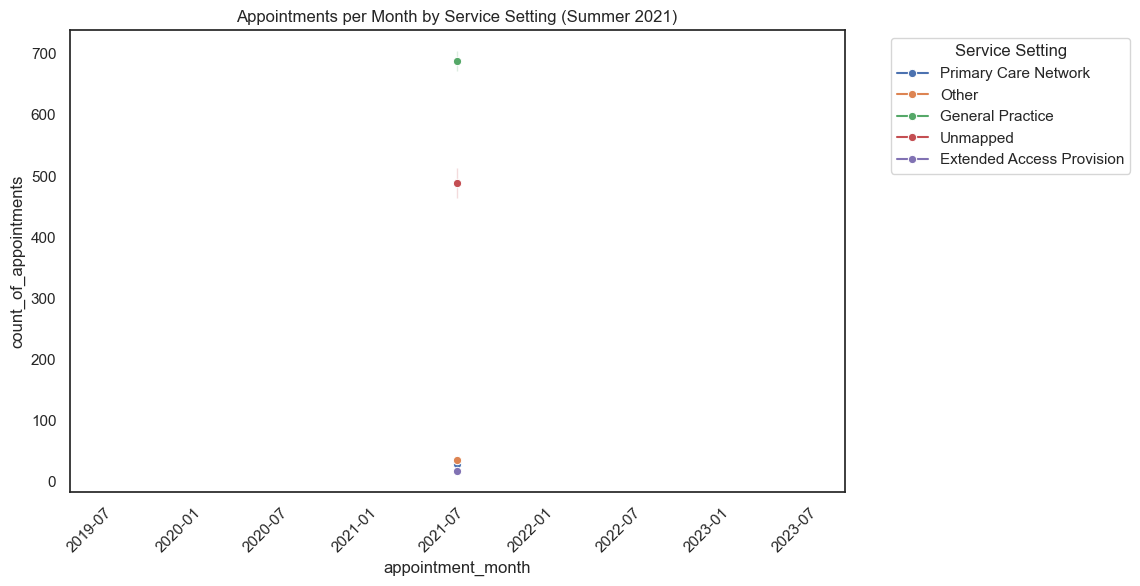

In [175]:
# Filter for Summer 2021
summer = nc_plot[
    (nc_plot['season'] == 'Summer') &
    (nc_plot['appointment_month'] >= '2021-06-01') &
    (nc_plot['appointment_month'] <= '2021-08-31')
]

# Lineplot
sns.lineplot(
    data=summer,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o'
)
plt.title(f'Appointments per Month by Service Setting (Summer 2021)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Autumn (September to November 2021):**

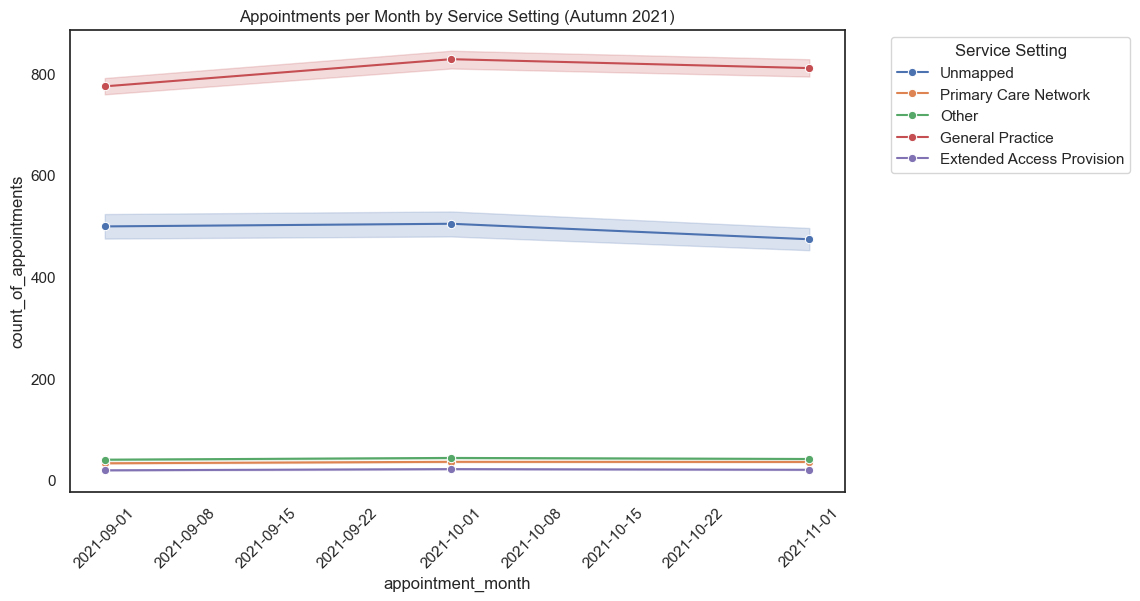

In [176]:
# Look at September to November 2021 in more detail to allow a closer look.
# Create a lineplot

# Filter for Autumn 2022
spring = nc_plot[nc_plot['season'] == 'Autumn']

# Create a lineplot
sns.lineplot(
    data=spring,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o'
)
plt.title('Appointments per Month by Service Setting (Autumn 2021)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Winter (December to February 2022):**

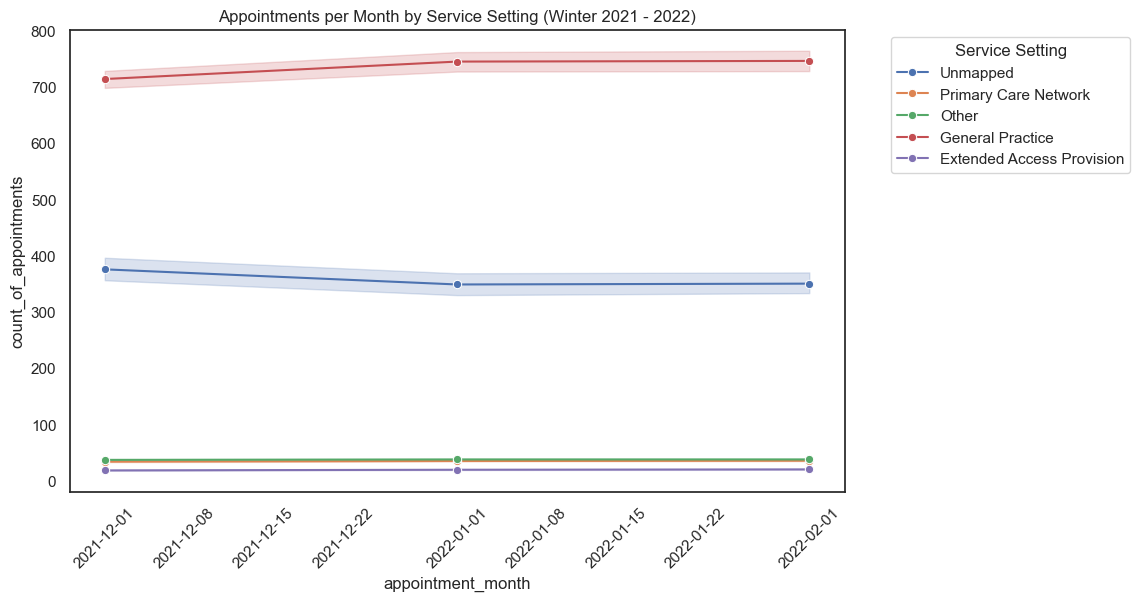

In [177]:
# Look at December to February 2022 in more detail to allow a closer look.

# Filter for Winter 2021-2022
spring = nc_plot[nc_plot['season'] == 'Winter']

# Create a lineplot
sns.lineplot(
    data=spring,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o'
)
plt.title('Appointments per Month by Service Setting (Winter 2021 - 2022)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Spring (March to May 2022):**

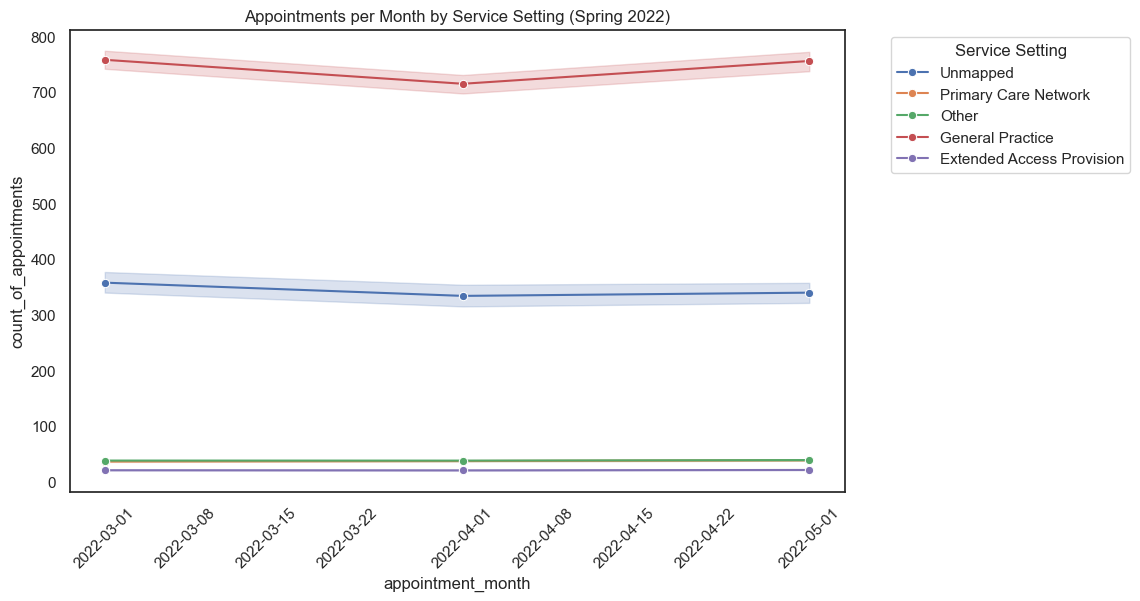

In [178]:
# Look at March to May 2022 in more detail to allow a closer look.

# Filter for Spring 2022
spring = nc_plot[nc_plot['season'] == 'Spring']

# Create a lineplot
sns.lineplot(
    data=spring,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o'
)
plt.title('Appointments per Month by Service Setting (Spring 2022)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations
Plotting each season separately made it harder to see overall seasonal changes at a glance. Across all four charts, General Practice consistently showed the highest number of appointments, followed by Extended Access Provision, with only small differences between seasons. The overall pattern suggests stable service activity rather than strong seasonal shifts.

# Part 5

### Analysis of tweets from Twitter/X with hashtags related to healthcare in the UK.

This section looks at external data from Twitter (now X) to see whether social media discussions might provide useful context for understanding public views on NHS services. The data includes tweets related to healthcare topics and was analysed to identify the most common hashtags.

In [179]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [180]:
# Load the data set.
tweets = pd.read_csv ("tweets.csv")

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [181]:
# Explore the metadata.
tweets.describe()
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


In [182]:
# Explore the data set.
# Explore the tweet_retweet_count and tweet_favorite_count columns with the value_counts() function. 

tweets['tweet_retweet_count'].value_counts()

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
208     12
6       12
35      10
11       6
37       6
53       5
10       5
63       4
44       4
150      4
207      3
85       3
62       3
41       3
76       3
68       3
78       2
23       2
72       2
16       2
24       2
39       1
40       1
14       1
303      1
57       1
54       1
19       1
79       1
20       1
48       1
49       1
13       1
107      1
15       1
169      1
Name: count, dtype: int64

In [183]:
tweets['tweet_favorite_count'].value_counts()

tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
28       1
14       1
18       1
11       1
9        1
20       1
7        1
13       1
8        1
10       1
12       1
17       1
42       1
Name: count, dtype: int64

In [ ]:
# Create a new DataFrame containing only the text.

# Create an empty list to store hashtags
tags = []

# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Convert to lowercase
            tags.append(z.lower())

# Turn the list into a pandas Series and count occurrences
tags = pd.Series(tags).value_counts()

# View the DataFrame.
# Display the first 30 records.
tags.head(30)

In [184]:
# Convert the series to a DataFrame in preparation for visualisation.
data = tags.reset_index()

# Rename the columns
data.columns = ['word', 'count']

# Fix the count datatype
data['count'] = data['count'].astype(int)

# View the result.
data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


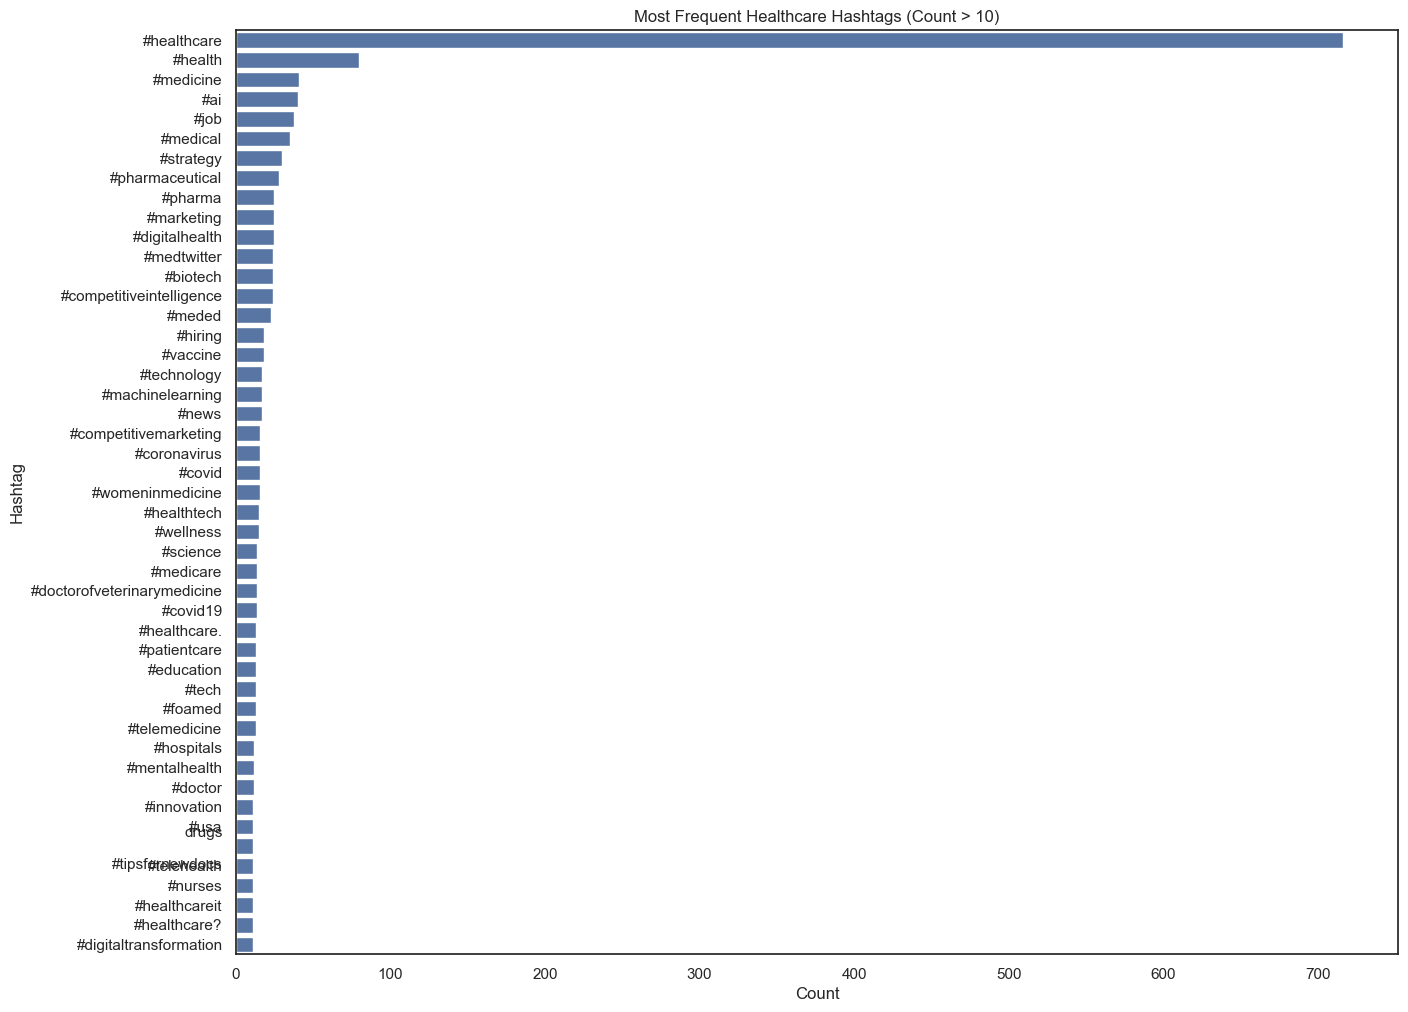

In [185]:
# Filter hashtags that appear more than 10 times
filtered_data = data[data['count'] > 10]

# Create the bar plot
sns.barplot(
    data=filtered_data,
    x='count',
    y='word'
)

# Add title and labels
plt.title('Most Frequent Healthcare Hashtags (Count > 10)')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

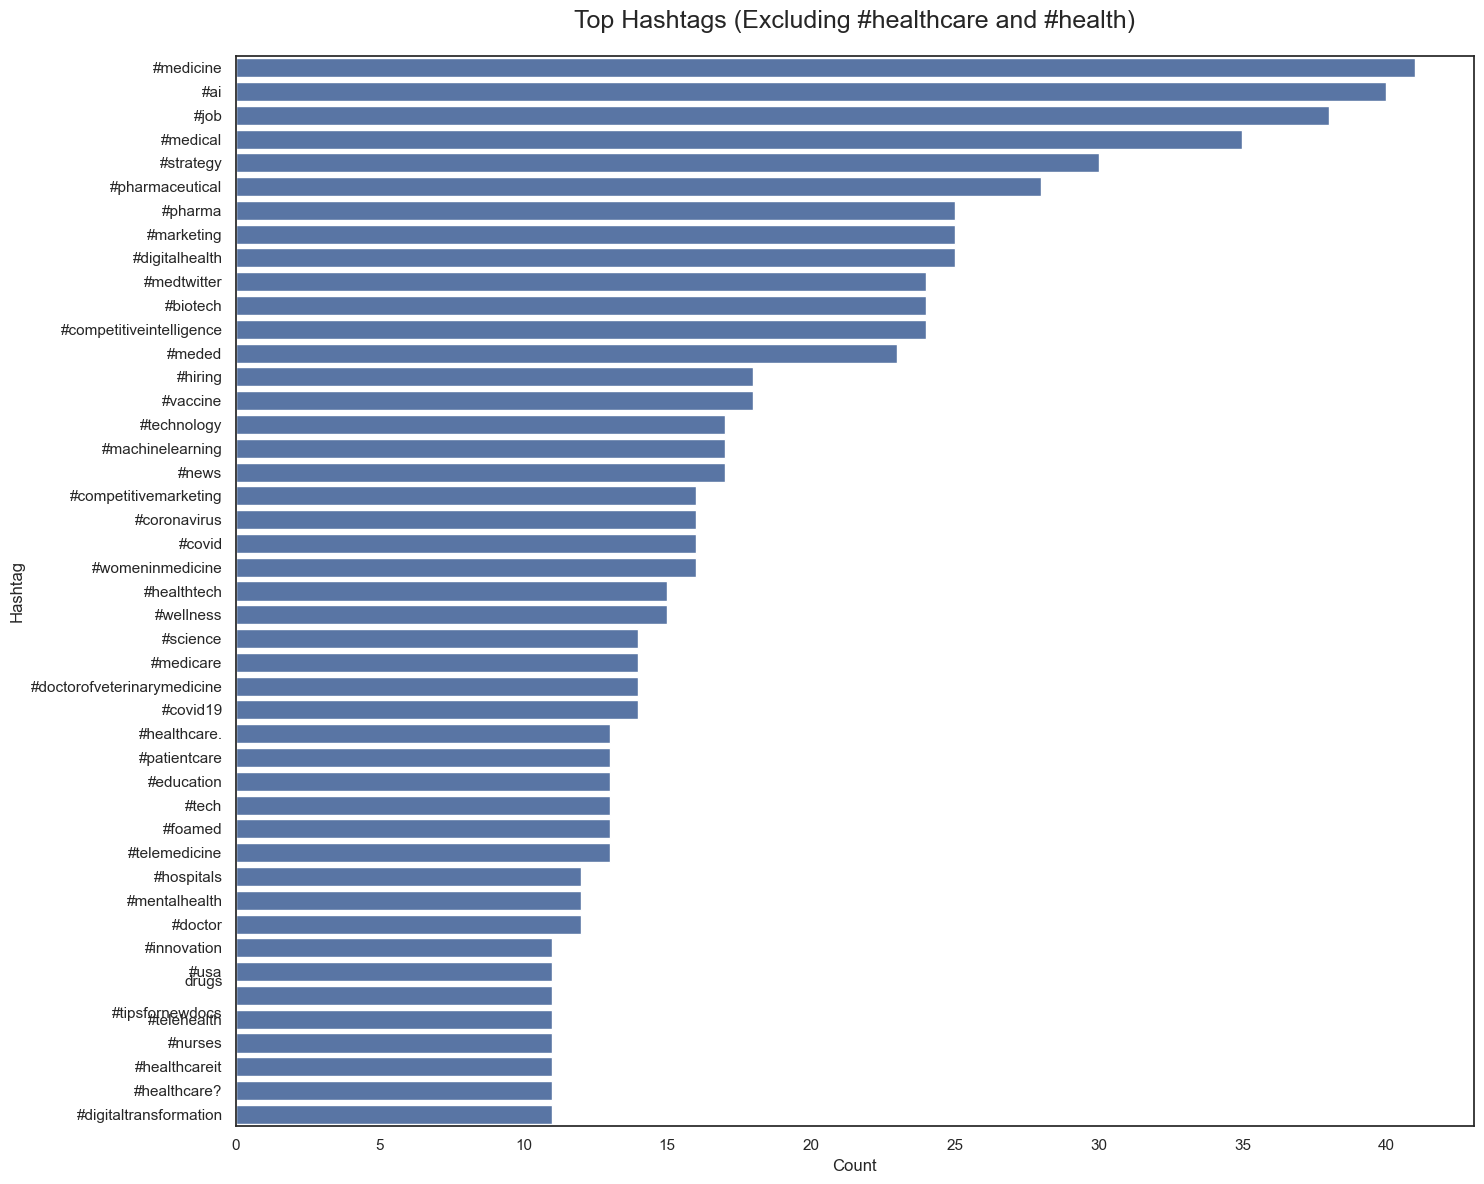

In [133]:
# Create a new filtered dataset
filtered_data = data[data['count'] > 10]

# Remove overrepresented hashtags
filtered_data = filtered_data[~filtered_data['word'].isin(['#healthcare', '#health'])]

# Sort for a neater plot
filtered_data = filtered_data.sort_values('count', ascending=False)

# Create the new bar plot
sns.barplot(
    data=filtered_data,
    x='count',
    y='word'
)

plt.title('Top Hashtags (Excluding #healthcare and #health)', fontsize=18, pad=20)
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout() # To address spacing issue with some bar labels
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations
The most frequent hashtags are terms like #medicine, #AI, #medical, #pharma, and #digitalhealth. This tells us that online conversation tends to focus on innovation, technology, and the medical profession, rather than on patient experience or access to care.  While this gives a sense of overall public interest, the data is too broad and unstructured to directly support conclusions about appointment demand or utilisation. Social media data could still have value if filtered by region or topic in future work, but in this case it offered only limited additional insight.

# Part 6

### Recommendations to the NHS. 

This section explores several questions about staff levels, appointment attendance, and scheduling patterns to identify where improvements might have the greatest impact. Analyses focused on how appointment numbers varied by healthcare professional type, how attendance outcomes changed over time, and whether the time between booking and appointment influenced attendance rates. Additional visualisations were created to look more closely at “Did Not Attend” (DNA) behaviour by region and booking interval.

In [186]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visuals
sns.set(rc={'figure.figsize': (15, 12)})
sns.set_style('white')

In [187]:
# View the existing DataFrame
print(ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB
None


In [188]:
# Print the min and max dates (using the defined function created earlier).
print_min_max_dates(ar, 'appointment_month')

Earliest date: 2020-01-01 00:00:00
Latest date: 2022-06-01 00:00:00


In [189]:
# Filter from August 2021 onwards (without changing datetime format again)
ar = ar[ar['appointment_month'] >= '2021-08-01']

# Confirm the filtered data
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [190]:
# Create an aggregated dataset to review the different features
ar_agg = ar.groupby(
    ['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']
)['count_of_appointments'].sum().reset_index()

# View the new DataFrame
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [191]:
# Determine the total number of appointments per month.
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Determine the total number of appointments per month
# and calculate the average daily utilisation (% of 1.2 million appointments per day)

# Group by appointment_month and sum total appointments
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Add a new column to indicate average utilisation of service
# Divide monthly total by 30 to estimate daily appointments, then compare against capacity
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30) / 1_200_000 * 100

# Round utilisation to one decimal place
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the new DataFrame
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08-01,23852171,66.3
1,2021-09-01,28522501,79.2
2,2021-10-01,30303834,84.2
3,2021-11-01,30405070,84.5
4,2021-12-01,25140776,69.8
5,2022-01-01,25635474,71.2
6,2022-02-01,25355260,70.4
7,2022-03-01,29595038,82.2
8,2022-04-01,23913060,66.4
9,2022-05-01,27495508,76.4


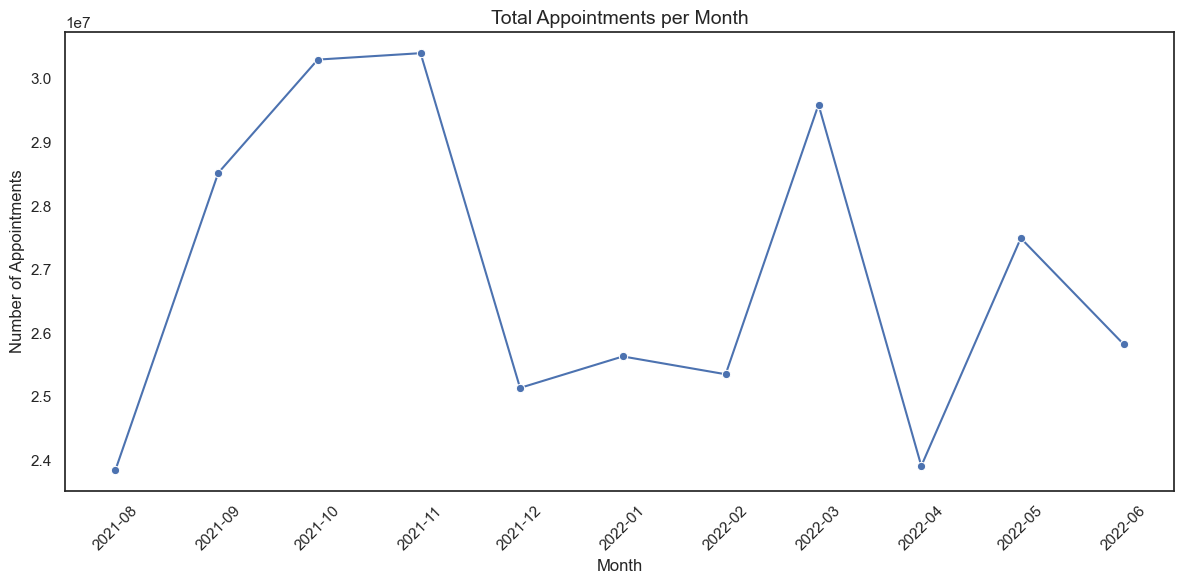

In [192]:
# Plot sum of count of monthly visits.
# The appointment_month column was already converted to string data type earlier in the notebook

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ar_df,
    x='appointment_month',
    y='count_of_appointments',
    marker='o'
)
plt.title('Total Appointments per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [193]:
# Create a new column for easier readability
ar_df['appointments_millions'] = ar_df['count_of_appointments'] / 1_000_000

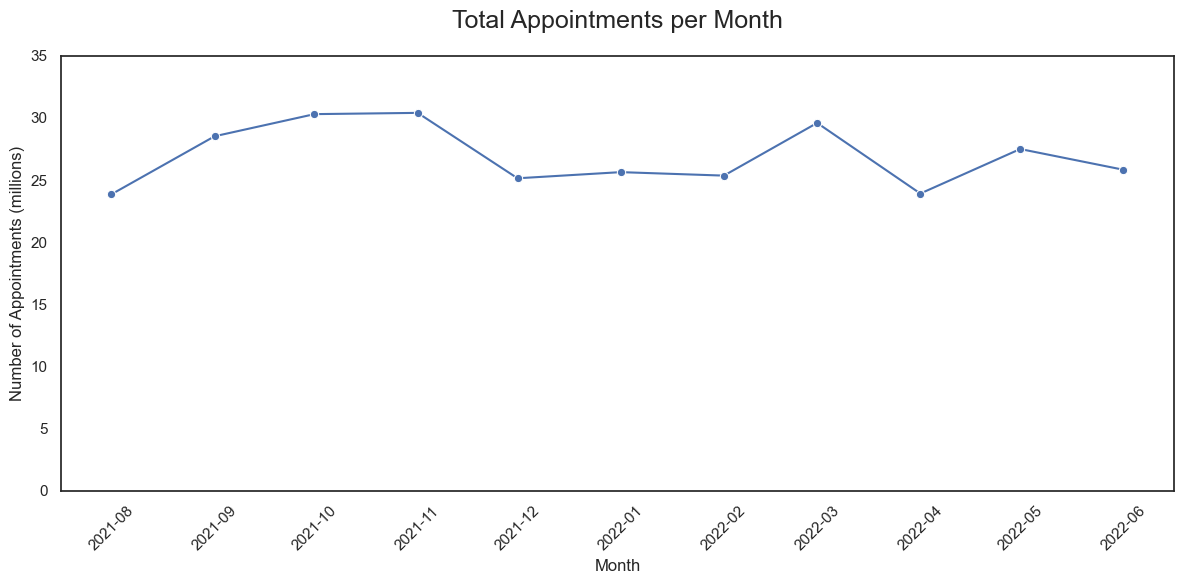

In [194]:
# Monthly appointments (in millions)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ar_df,
    x='appointment_month',
    y='appointments_millions',
    marker='o'
)
plt.title('Total Appointments per Month', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 35)
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

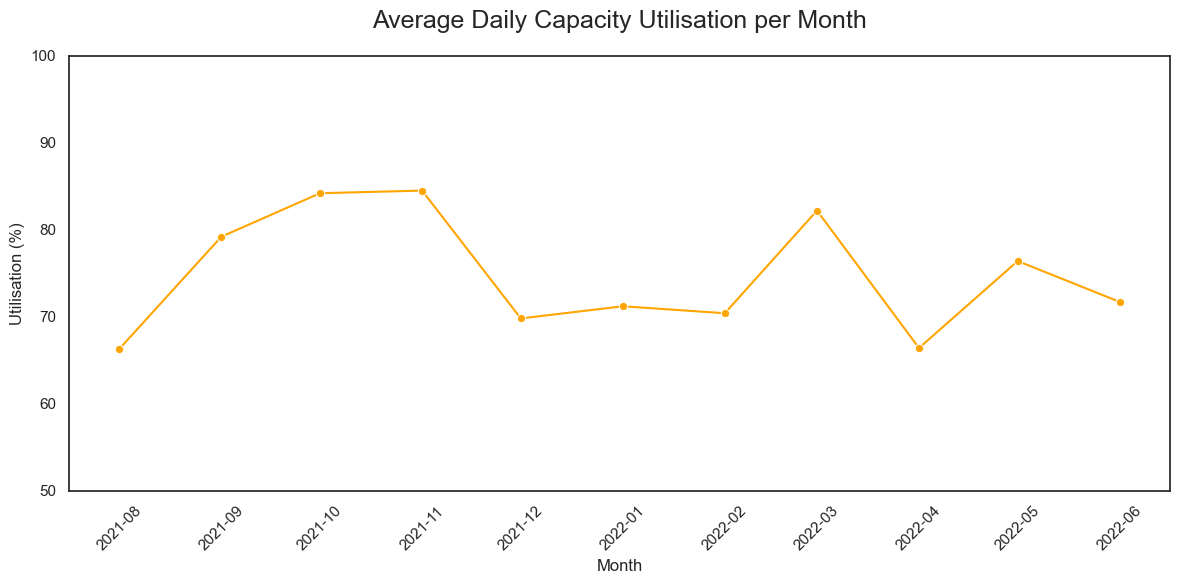

In [196]:
# Plot monthly capacity utilisation.
# Create a lineplot.

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ar_df,
    x='appointment_month',
    y='utilisation',
    marker='o',
    color='orange'
)
plt.title('Average Daily Capacity Utilisation per Month', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Utilisation (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(50, 100)
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

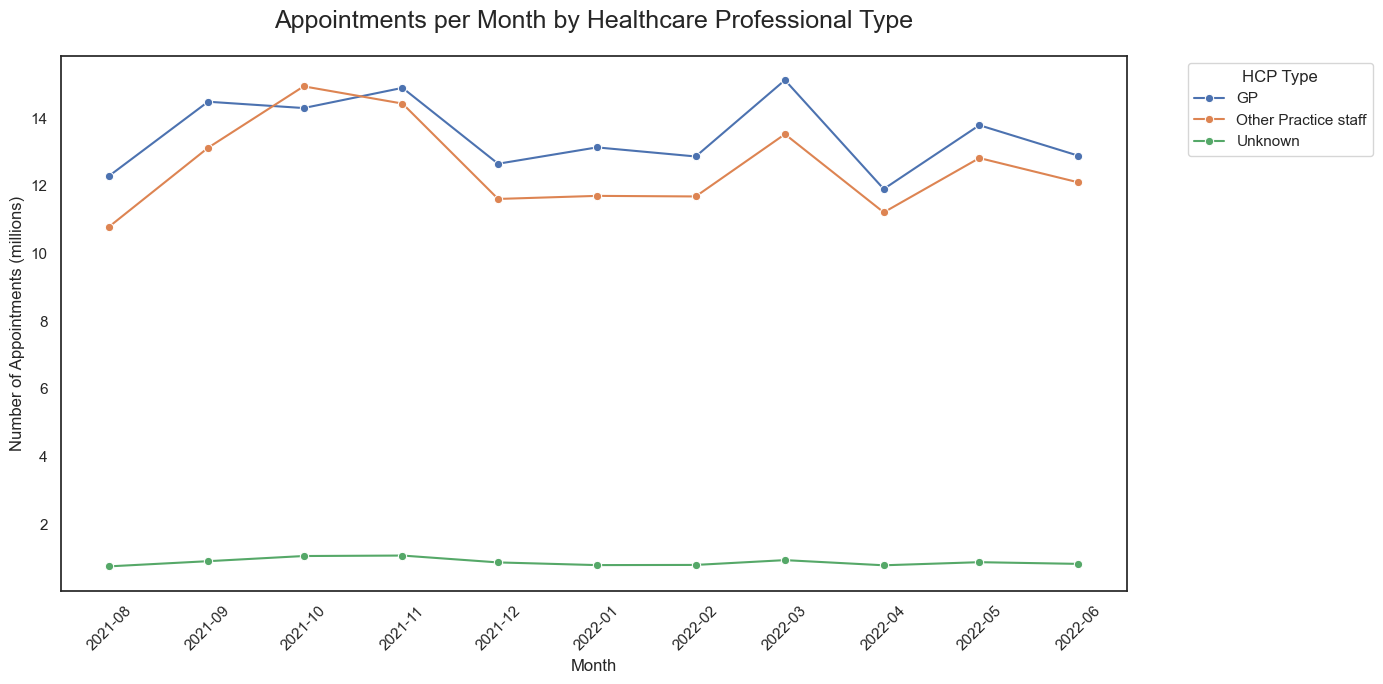

In [106]:
# Create a line plot to answer the question.

# Group by month and healthcare-professional type
hcp_trends = (
    ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments']
      .sum()
      .reset_index()
)

# Convert to millions for readability
hcp_trends['appointments_millions'] = hcp_trends['count_of_appointments'] / 1_000_000

# Create the Seaborn lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=hcp_trends,
    x='appointment_month',
    y='appointments_millions',
    hue='hcp_type',
    marker='o'
)

plt.title('Appointments per Month by Healthcare Professional Type', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=45)
plt.legend(title='HCP Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

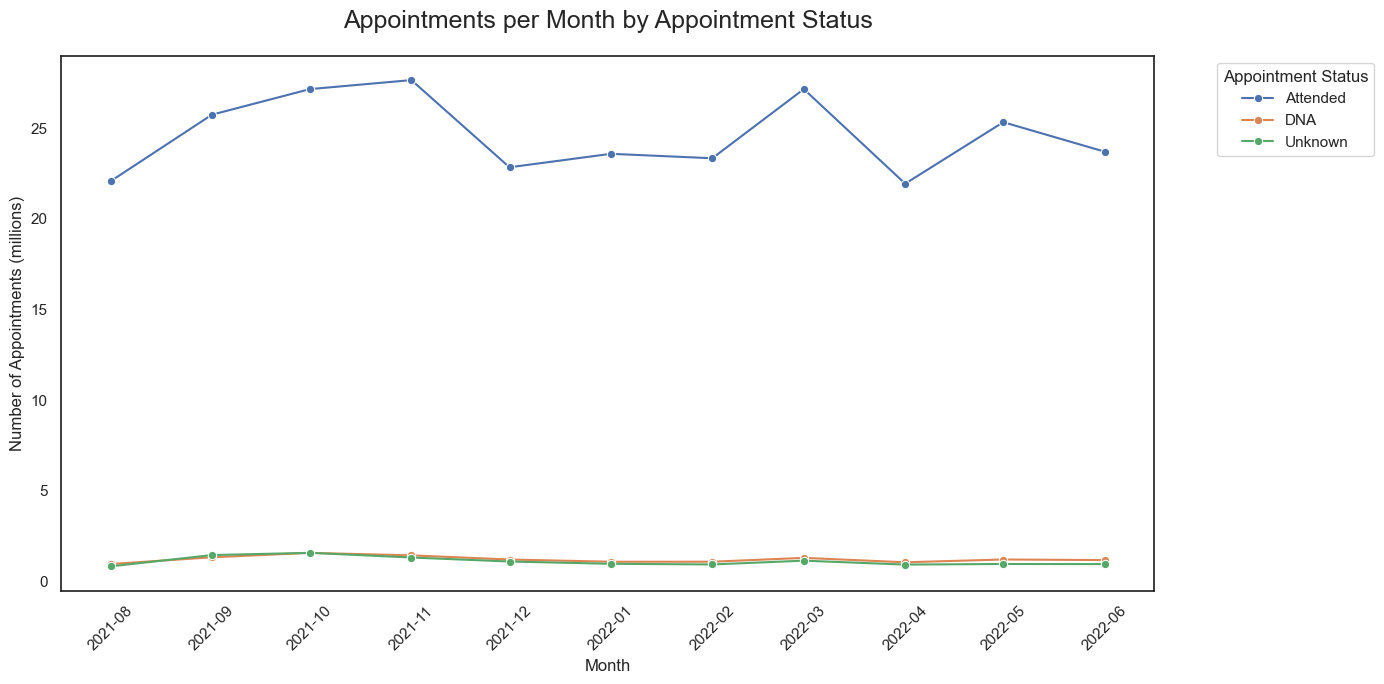

In [117]:
# Create a line plot to answer the question.

# Group by month and appointment status
attendance_trends = (
    ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments']
      .sum()
      .reset_index()
)

# Convert totals to millions for readability
attendance_trends['appointments_millions'] = attendance_trends['count_of_appointments'] / 1_000_000

# Create the Seaborn lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=attendance_trends,
    x='appointment_month',
    y='appointments_millions',
    hue='appointment_status',
    marker='o'
)

plt.title('Appointments per Month by Appointment Status', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

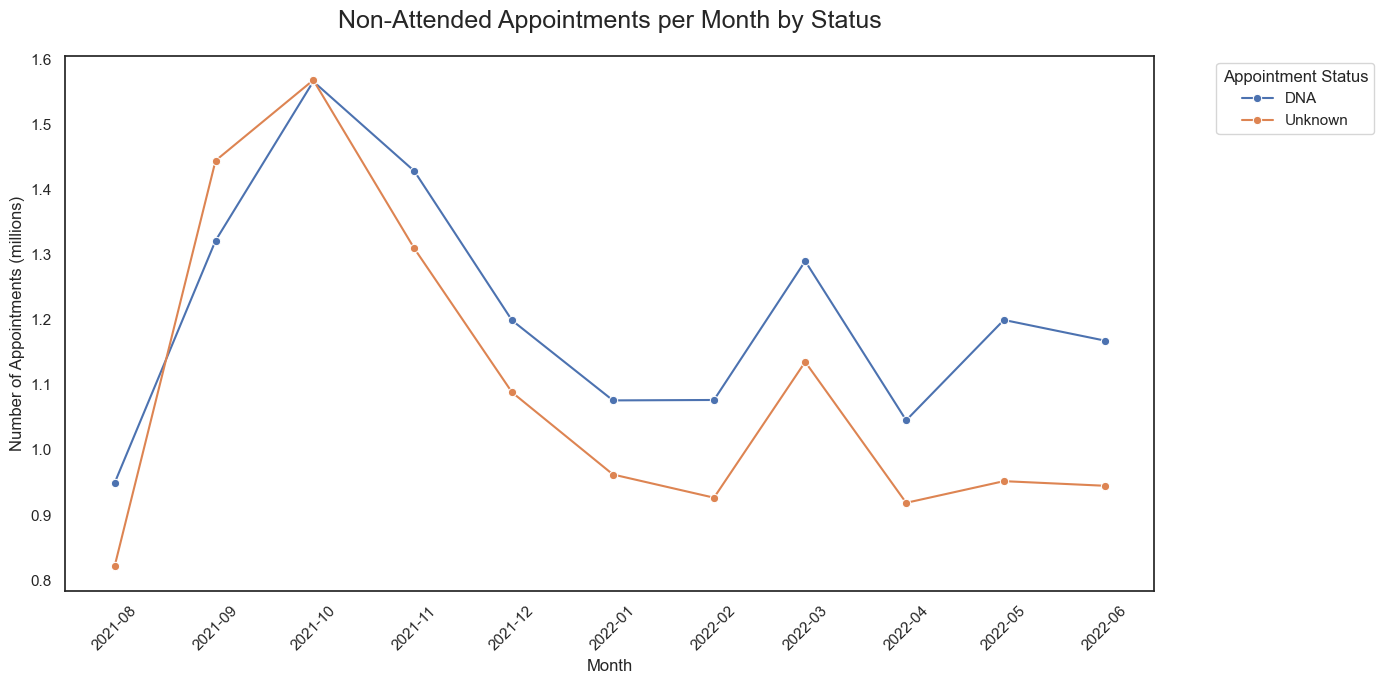

In [134]:
# Focus on non-attended appointments

# Filter out the 'Attended' status (to better see variation among "Did Not Attend" and "Unknown")
attendance_non_attended = attendance_trends[attendance_trends['appointment_status'] != 'Attended']

# Plot the remaining statuses
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=attendance_non_attended,
    x='appointment_month',
    y='appointments_millions',
    hue='appointment_status',
    marker='o'
)

plt.title('Non-Attended Appointments per Month by Status', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

In [128]:
# Examine variations in DNA rate by location

# Group by location and appointment status
dna_region = (
    ar.groupby(['icb_ons_code', 'appointment_status'])['count_of_appointments']
      .sum()
      .reset_index()
)
dna_region.head()

,icb_ons_code,appointment_status,count_of_appointments
0,E54000008,Attended,11897557
1,E54000008,DNA,732856
2,E54000008,Unknown,619898
3,E54000010,Attended,4794962
4,E54000010,DNA,268625


In [129]:
# Pivot the data so each appointment status has its own column
dna_pivot = dna_region.pivot(
    index='icb_ons_code',
    columns='appointment_status',
    values='count_of_appointments'
).fillna(0)

# Add a total column
dna_pivot['Total_Appointments'] = dna_pivot.sum(axis=1)

dna_pivot.head()

appointment_status,Attended,DNA,Unknown,Total_Appointments
icb_ons_code,,,,
E54000008,11897557,732856,619898,13250311
E54000010,4794962,268625,262203,5325790
E54000011,2360872,105274,102341,2568487
E54000013,3947733,152036,153625,4253394
E54000015,5810231,233322,198977,6242530


In [130]:
# Calculate % DNA
dna_pivot['DNA_Rate_%'] = (
    dna_pivot['DNA'] / dna_pivot['Total_Appointments'] * 100
).round(2)

# Sort from highest to lowest
dna_pivot = dna_pivot.sort_values('DNA_Rate_%', ascending=False)

dna_pivot.head(10)

appointment_status,Attended,DNA,Unknown,Total_Appointments,DNA_Rate_%
icb_ons_code,,,,,
E54000029,8580355,584327,424209,9588891,6.09
E54000062,6304923,426234,302480,7033637,6.06
E54000057,12281729,837503,738668,13857900,6.04
E54000055,5755631,381487,246628,6383746,5.98
E54000030,7039643,448185,362342,7850170,5.71
E54000031,6444408,406608,304014,7155030,5.68
E54000028,6111747,381109,255102,6747958,5.65
E54000008,11897557,732856,619898,13250311,5.53
E54000039,4446216,251879,201413,4899508,5.14


In [131]:
# Top 5 regions with highest DNA rates
top5 = dna_pivot[['DNA_Rate_%']].sort_values(by='DNA_Rate_%', ascending=False).head(5)
print("Top 5 DNA Rates:")
display(top5)

# Bottom 5 regions with lowest DNA rates
bottom5 = dna_pivot[['DNA_Rate_%']].sort_values(by='DNA_Rate_%', ascending=True).head(5)
print("Bottom 5 DNA Rates:")
display(bottom5)

Top 5 DNA Rates:


appointment_status,DNA_Rate_%
icb_ons_code,
E54000029,6.09
E54000062,6.06
E54000057,6.04
E54000055,5.98
E54000030,5.71


Bottom 5 DNA Rates:


appointment_status,DNA_Rate_%
icb_ons_code,
E54000026,2.98
E54000059,3.09
E54000040,3.20
E54000041,3.30
E54000058,3.35


**Question 4:** Are there changes in terms of appointment type and the busiest months?

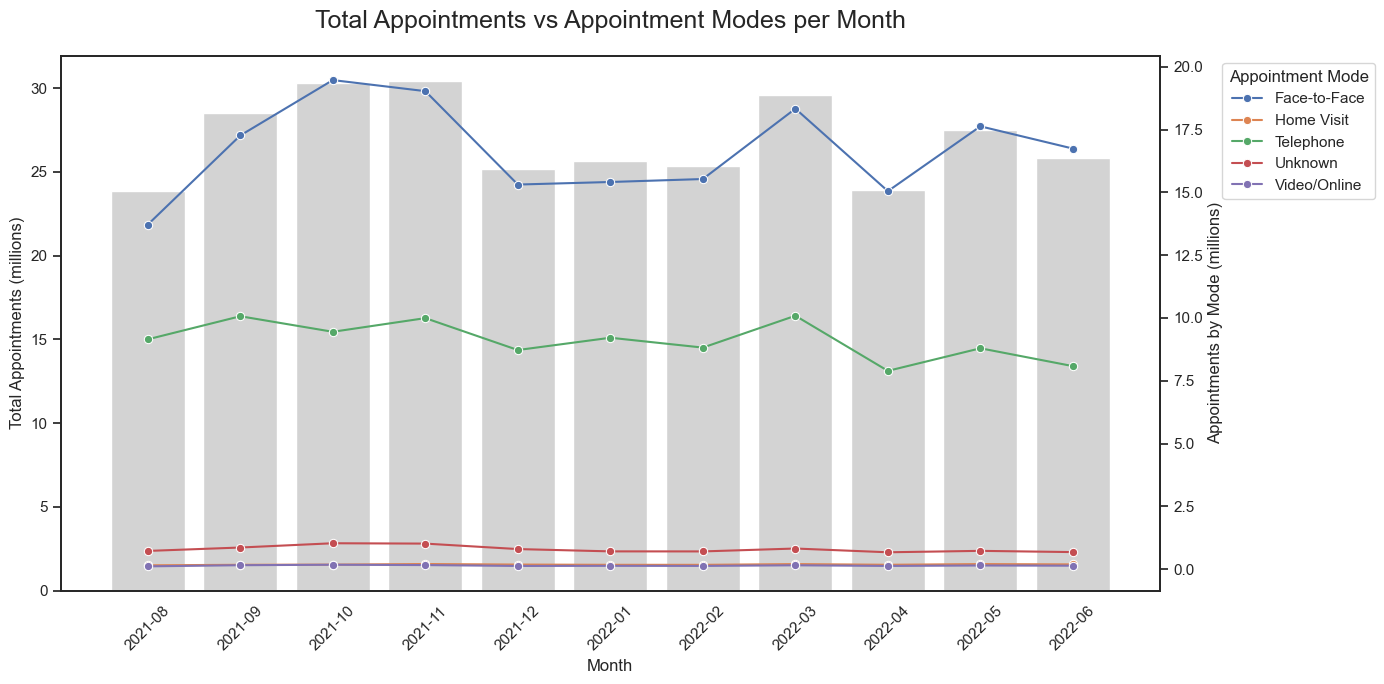

In [107]:
# Build a single, consistent month order from the raw 'ar' table
month_order = (
    pd.to_datetime(ar['appointment_month'])
      .dt.to_period('M').astype(str)
      .sort_values()
      .unique()
)

# Prep totals (bars)
total_monthly = (
    ar.groupby('appointment_month')['count_of_appointments']
      .sum().reset_index()
)

# Force common string format
total_monthly['appointment_month'] = pd.to_datetime(total_monthly['appointment_month']).dt.to_period('M').astype(str)
total_monthly['appointment_month'] = pd.Categorical(total_monthly['appointment_month'],
                                                    categories=month_order, ordered=True)
total_monthly['appointments_millions'] = total_monthly['count_of_appointments'] / 1_000_000

# Prep per-mode (lines)
appt_type = (
    ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments']
      .sum().reset_index()
)

appt_type['appointment_month'] = pd.to_datetime(appt_type['appointment_month']).dt.to_period('M').astype(str)
appt_type['appointment_month'] = pd.Categorical(appt_type['appointment_month'],
                                                categories=month_order, ordered=True)
appt_type['appointments_millions'] = appt_type['count_of_appointments'] / 1_000_000

# Plot: bars (left y-axis) + lines (right y-axis) with identical x-order
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bars: totals
sns.barplot(
    data=total_monthly,
    x='appointment_month',
    y='appointments_millions',
    color='lightgrey',
    ax=ax1,
    order=month_order
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Appointments (millions)')
plt.xticks(rotation=45)

# Lines: per mode
ax2 = ax1.twinx()
sns.lineplot(
    data=appt_type,
    x='appointment_month',
    y='appointments_millions',
    hue='appointment_mode',
    marker='o',
    ax=ax2,
    sort=False,                 
    errorbar=None               s
)
ax2.set_ylabel('Appointments by Mode (millions)')

plt.title('Total Appointments vs Appointment Modes per Month', fontsize=18, pad=20)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

Face-to-face appointments continue to dominate NHS activity, accounting for the majority of total monthly volume. Telephone consultations remain the primary remote alternative, though volumes are much lower. Other modes such as online or home visits are minimal. Peaks in total activity appear driven by increased face-to-face demand rather than shifts in mode, suggesting limited flexibility in delivery methods.”

**Question 5:** Are there any trends in time between booking and appointment?

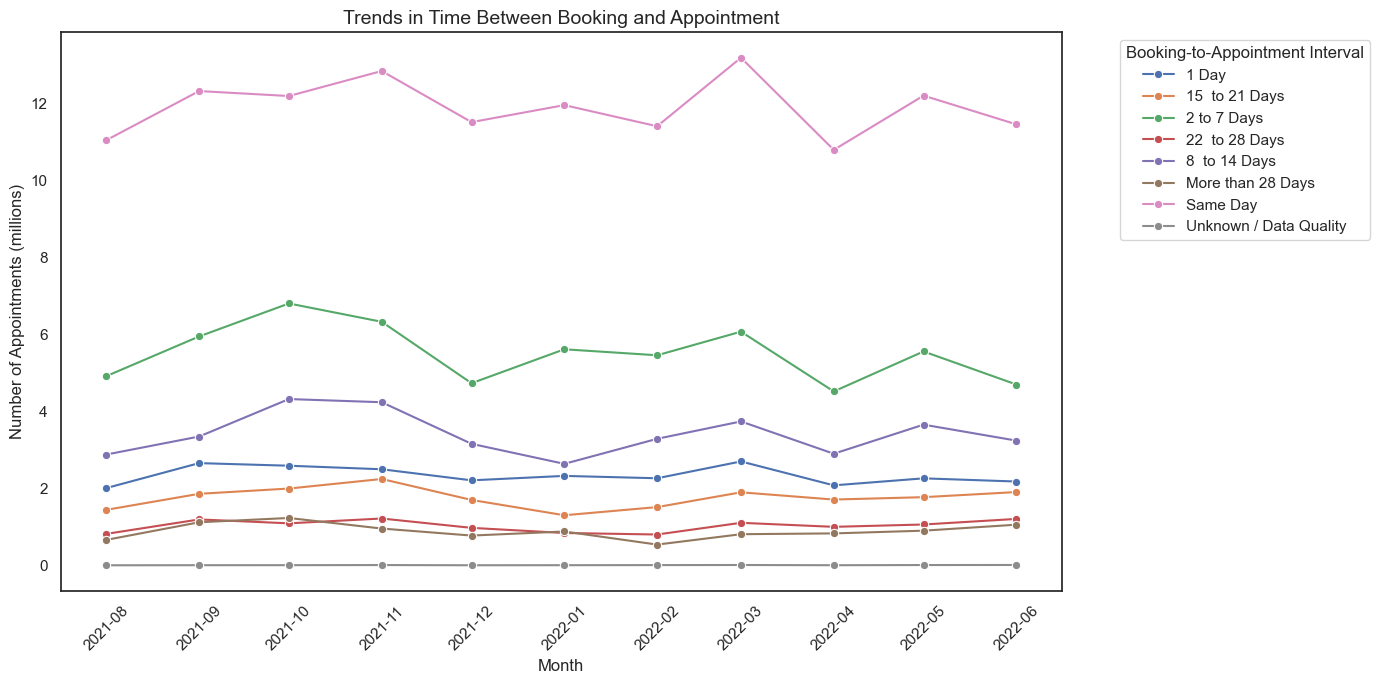

In [197]:
# Create a line plot to answer the question.

# Group by month and booking-time category
booking_trends = (
    ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments']
      .sum()
      .reset_index()
)

# Convert totals to millions for consistency
booking_trends['appointments_millions'] = booking_trends['count_of_appointments'] / 1_000_000

# Plot with Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=booking_trends,
    x='appointment_month',
    y='appointments_millions',
    hue='time_between_book_and_appointment',
    marker='o'
)

plt.title('Trends in Time Between Booking and Appointment', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=45)
plt.legend(title='Booking-to-Appointment Interval', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [198]:
# Calculate proportion of appointments that take place on same day, within one day, etc.

# Group by time interval and sum appointment counts
interval_df = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().reset_index()

# Calculate percent of total
interval_df['Percent_of_Total'] = (
    interval_df['count_of_appointments'] / interval_df['count_of_appointments'].sum() * 100
).round(1)

# Sort the rows in the logical order you want
interval_order = [
    'Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days',
    '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality'
]
interval_df['time_between_book_and_appointment'] = pd.Categorical(
    interval_df['time_between_book_and_appointment'],
    categories=interval_order,
    ordered=True
)
interval_df = interval_df.sort_values('time_between_book_and_appointment').reset_index(drop=True)

# Display the results
interval_df

,time_between_book_and_appointment,count_of_appointments,Percent_of_Total
0,Same Day,130976642,44.2
1,1 Day,25872974,8.7
2,2 to 7 Days,60734100,20.5
3,8 to 14 Days,37507051,12.7
4,15 to 21 Days,19454328,6.6
5,22 to 28 Days,11430584,3.9
6,More than 28 Days,9880538,3.3
7,Unknown / Data Quality,190553,0.1


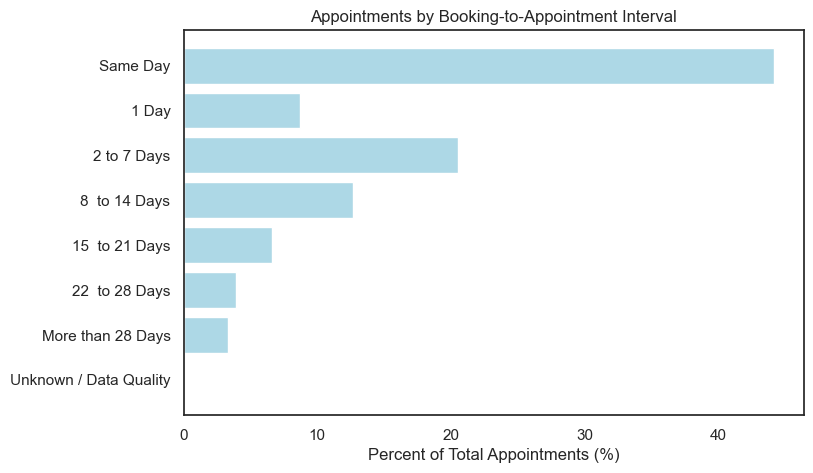

In [199]:
# Create a chart to show the above

plt.figure(figsize=(8,5))
plt.barh(interval_df['time_between_book_and_appointment'], interval_df['Percent_of_Total'], color='lightblue')
plt.xlabel('Percent of Total Appointments (%)')
plt.title('Appointments by Booking-to-Appointment Interval')
plt.gca().invert_yaxis()
plt.show()

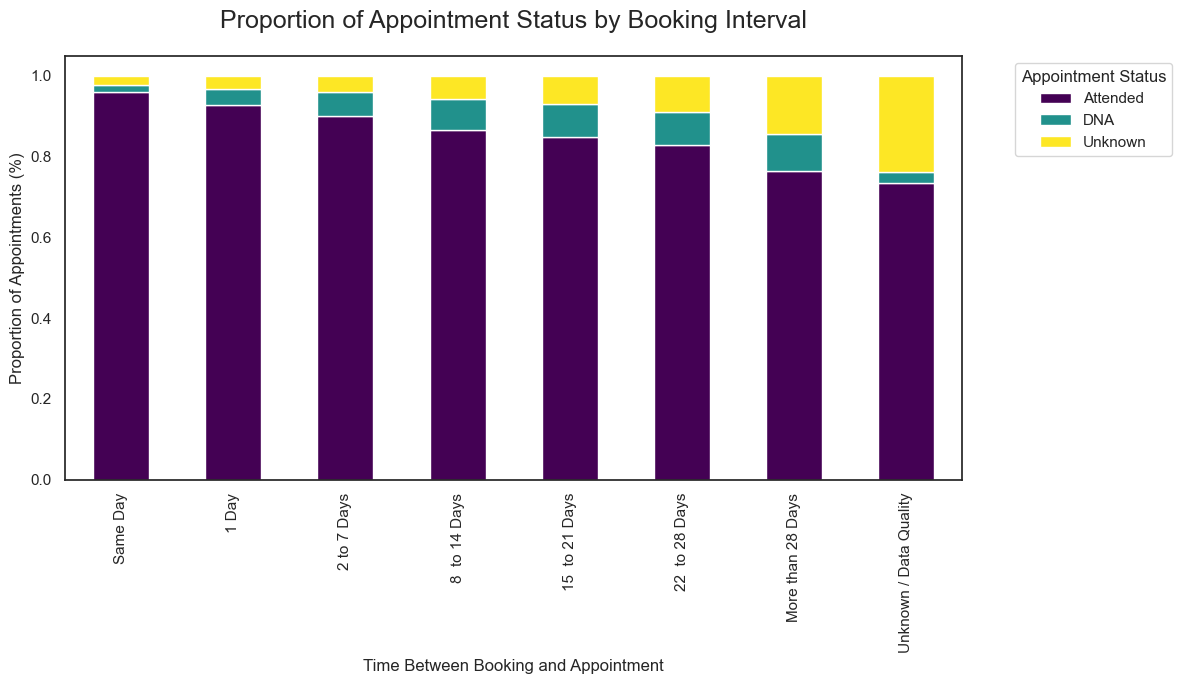

In [123]:
# Define desired logical order
interval_order = [
    'Same Day',
    '1 Day',
    '2 to 7 Days',
    '8  to 14 Days',
    '15  to 21 Days',
    '22  to 28 Days',
    'More than 28 Days',
    'Unknown / Data Quality'
]

# Recreate the crosstab
booking_attendance = pd.crosstab(
    ar['time_between_book_and_appointment'],
    ar['appointment_status'],
    values=ar['count_of_appointments'],
    aggfunc='sum',
    normalize='index'
)

# Reorder the rows using your interval list
booking_attendance = booking_attendance.reindex(interval_order)

# Reset index for plotting
booking_attendance = booking_attendance.reset_index(names='time_between_book_and_appointment')

# Plot the stacked bar chart
booking_attendance.plot(
    x='time_between_book_and_appointment',
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis'
)

plt.title('Proportion of Appointment Status by Booking Interval', fontsize=18, pad=20)
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Proportion of Appointments (%)')
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')
plt.show()

**Question 6:** How do the various service settings compare?

In [200]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,2021-08


In [201]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_df = nc[['appointment_month', 'service_setting', 'count_of_appointments']]

# View the DataFrame
nc_df.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08-01,Primary Care Network,3
1,2021-08-01,Other,7
2,2021-08-01,General Practice,79
3,2021-08-01,General Practice,725
4,2021-08-01,General Practice,2


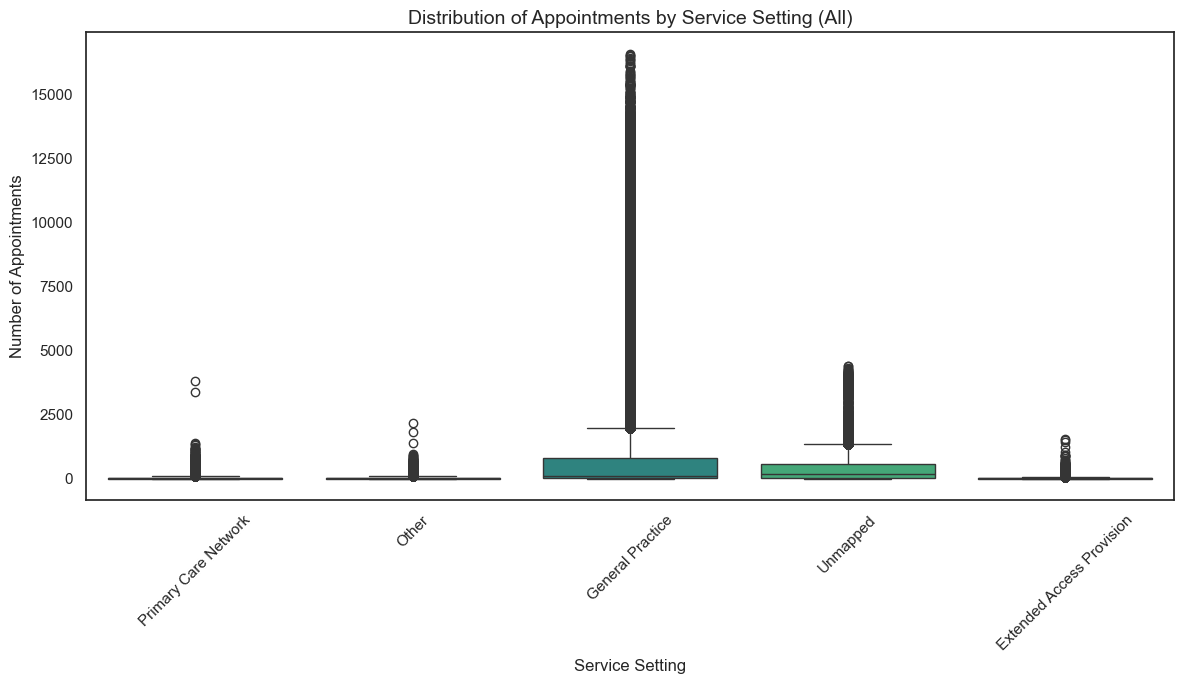

In [202]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.

# Create a new DataFrame with the relevant columns
nc_df = nc[['appointment_month', 'service_setting', 'count_of_appointments']]

# View the DataFrame
nc_df.head()

# Create the first boxplot (all service settings)
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=nc_df,
    x='service_setting',
    y='count_of_appointments',
    palette='viridis'
)

plt.title('Distribution of Appointments by Service Setting (All)', fontsize=14)
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

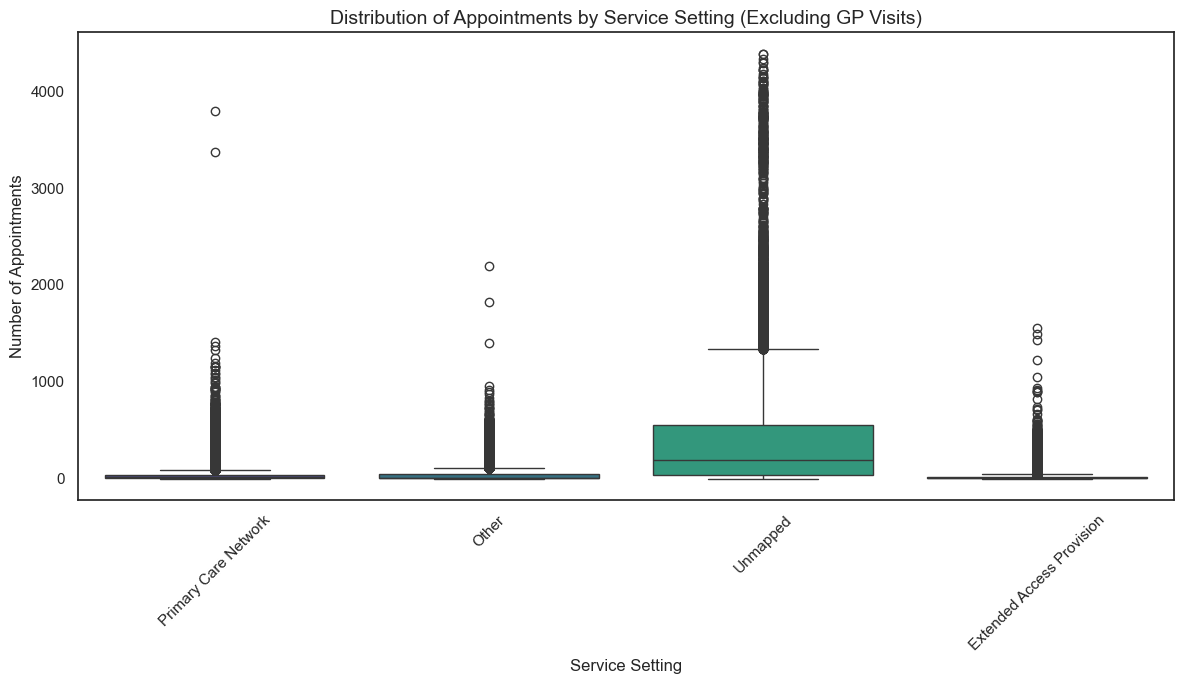

In [203]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.

# Q6 – Boxplot excluding GP visits

# Filter out GP visits
nc_no_gp = nc_df[nc_df['service_setting'] != 'General Practice']

# Create the boxplot excluding GP visits
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=nc_no_gp,
    x='service_setting',
    y='count_of_appointments',
    palette='viridis'
)

plt.title('Distribution of Appointments by Service Setting (Excluding GP Visits)', fontsize=14)
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations
GPs and other practice staff together account for the majority of appointments, with broadly similar trends over time. The number of missed appointments rises in line with overall appointment volumes, suggesting DNA behaviour is linked mainly to service pressure rather than sudden behavioural shifts. However, DNA rates vary significantly by region and increase as the waiting interval between booking and appointment grows. These insights suggest that improving scheduling efficiency and investigating local variations could help reduce missed appointments and improve capacity use.

### Provide a summary of your findings and recommendations based on the analysis.

> The analysis showed that total appointment volumes in primary care remained high throughout the period, with noticeable peaks around November 2021 and March 2022. Utilisation rates stayed close to or above estimated daily capacity, suggesting that staffing and resources were operating near full stretch for much of the time. General Practice accounted for the majority of activity, supported by other practice staff whose combined appointments followed similar trends. Most consultations were face-to-face or by telephone, reflecting hybrid working patterns established during and after COVID-19. Missed appointments (Did Not Attend) represented a small but important share of total activity. DNA rates rose slightly in high-volume months, varied by region, and increased when the waiting interval between booking and appointment was longer. Overall, it is recommended that the NHS continue to monitor utilisation and attendance trends, investigate regional differences in DNA rates, strengthen patient engagement and reminder systems, and improve data completeness and consistency.